In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix 
from glob import glob
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
y_pred = np.load('../logs/y_pred.npy')

wav_paths = glob('{}/**'.format('../wavfiles'), recursive=True)
wav_paths = sorted([x.replace(os.sep, '/') for x in wav_paths if '.wav' in x])
classes = sorted(os.listdir('../wavfiles'))
labels = [os.path.split(x)[0].split('/')[-1] for x in wav_paths]

le = LabelEncoder()
y_true = le.fit_transform(labels)
y_hot = to_categorical(y_true)
y_pred_le = np.argmax(y_pred, axis=1)
y_pred_labels = [classes[x] for x in y_pred_le]
y_true_labels = [classes[x] for x in y_true]

unique_labels = np.unique(labels)


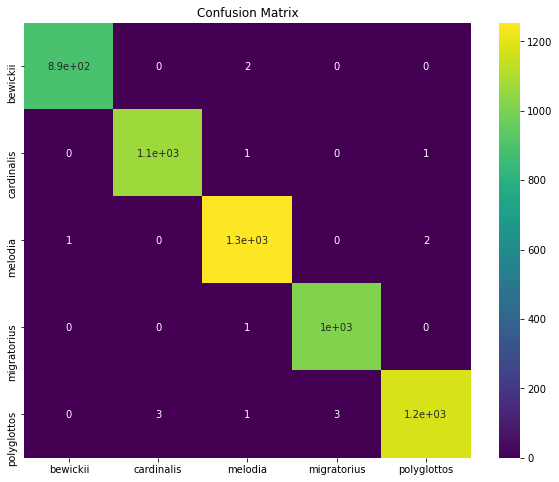

In [3]:
conf_mat = confusion_matrix(y_true_labels, y_pred_labels, labels=unique_labels)
df_cm = pd.DataFrame(conf_mat, index = unique_labels,
                     columns = unique_labels)
plt.figure(figsize = (10,8))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, cmap='viridis')
plt.show()